In [31]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.sparse import hstack,vstack
from sklearn.linear_model import LogisticRegression
import taskALoader as t_a
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC,SVC
from sklearn.utils import class_weight
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.model_selection import PredefinedSplit
from sklearn.preprocessing import LabelEncoder

In [32]:
df = pd.read_csv("task_A_dataset.csv").fillna(' ')
data = t_a.json_creator(df)
X,y = t_a.get_data(data,post_title_weight=True)

X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train_all, y_train_all, test_size=0.25, random_state=1)

['a' 'b' 'c' 'd']


In [33]:
df_from_json = df.from_dict(data)

In [34]:
df_from_json.head()

,label,posts,user_id
0,d,"[[2injb4, 1412770416, SuicideWatch, I can't se...",16
1,c,"[[10izh0, 1348693543, SuicideWatch, For a frie...",56
2,c,"[[2oyc4z, 1418283108, SuicideWatch, I've been ...",137
3,a,"[[15zrrk, 1357362241, SuicideWatch, I cant do ...",152
4,c,"[[2jqzr0, 1413772908, SuicideWatch, Is it poss...",370


In [35]:
user_postss = list(df_from_json['posts'])

In [36]:
user_postss[0]

[['2injb4',
  1412770416,
  'SuicideWatch',
  "I can't see another way out.",
  "I'm stuck and I hate it. I have zero confidence in myself, my abilities, my future. I'm stuck in a dead end job that I want badly to get out of, but every time I consider university courses or a better, more technical career, I choke and get terrified. I have no confidence that i'll ever be able to get out of the state i'm in now. I don't want to be doing this for the rest of my life. Right now I think the only thing keeping me alive is the fact that I don't want to put my parents through their son killing himself. Other than that, my future seems hopeless and bleak, i'm not confident enough that I can get the skills I need to change it. And I just think dying would be so much easier than trying and failing to change everything."],
 ['2s3if4',
  1421012448,
  'SuicideWatch',
  "Nothing is working and i'm sliding back down.",
  "The more I think about things the more depressed I get and the more I consider 

In [37]:

all_posts = []

    
for user in user_postss:
    one_user_posts = ''
    for post_details in user:
        one_user_posts=one_user_posts+" "+str(post_details[3])+" "+str(post_details[3])+" "+str(post_details[4])
    all_posts.append(one_user_posts)



In [38]:
df_from_json['data'] = all_posts

lb_make = LabelEncoder()
df_from_json["class"] = lb_make.fit_transform(df_from_json["label"])


In [39]:
train_all_df,test_df= train_test_split(df_from_json, test_size=0.2, random_state=1)

train_df, val_df = train_test_split(train_all_df,test_size=0.25, random_state=1)



In [40]:
train_df.head()

,label,posts,user_id,data,class
215,c,"[[376zeb, 1432554024, SuicideWatch, I love lif...",20747,"I love life, but I don't deserve it. I love l...",2
470,a,"[[dv295, 1287781892, SuicideWatch, Need advice...",50028,Need advice regarding suicide and Japanese cu...,0
46,b,"[[2x7ije, 1424932642, SuicideWatch, How does o...",5004,How does one get over the feeling of ending i...,1
495,c,"[[h3vh5, 1304501676, SuicideWatch, I'm on the ...",51883,"I'm on the path to success, yet I hate life a...",2
83,d,"[[2w5194, 1424134288, SuicideWatch, Quickest s...",8554,Quickest suicide method? My loser boyfriend e...,3


{0: 31, 1: 8, 2: 21, 3: 40}
31.0
8.0
21.0
40.0


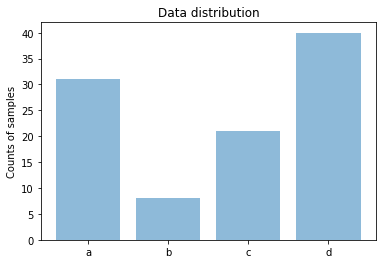

In [41]:
t_a.display_class_dis(y_test)

In [12]:
corpus_df = pd.read_csv("clpsych19_training_data/shared_task_posts.csv").fillna(' ')
p_title = corpus_df['post_title']
p_body = corpus_df['post_body']
corpus_text = pd.concat([p_title,p_body]) 

In [42]:
def get_predefined_split(features_train, features_val, target_train, target_val):
    always_train = np.empty((target_train.shape[0]), dtype=np.int32)
    #print(target_train.shape[0])
    always_train[:] = -1
    always_validate = np.empty((target_val.shape[0]), dtype=np.int32)
    always_validate[:] = 0
    pred_split_indices = np.concatenate((always_train, always_validate))
    curr_target_train = np.concatenate((target_train, target_val))
    #curr_features_train = vstack((features_train, features_val))
    curr_features_train = np.concatenate((features_train, features_val))
   
    ps = PredefinedSplit(test_fold=pred_split_indices)

    return curr_features_train, curr_target_train, ps

In [43]:
class TfidfVectorizerWrapper(TfidfVectorizer):
    def fit(self,x,y=None, **fit_params):
        x = corpus_text
        return super(TfidfVectorizerWrapper, self).fit(x, y, **fit_params)
        
    def transform(self, x, y=None, **fit_params):
        #x = [content.split('\t')[0] for content in x]  # filtering the input
        return super(TfidfVectorizerWrapper, self).transform(x, y, **fit_params)       

# Leave one out 

In [62]:
def runBestSVM(train,train_labels,test,best_pars):
    
    
    c = best_pars['classifier__C']
    multi_class = best_pars['classifier__multi_class']
    max_features = best_pars['tfidf__max_features']
    min_df = best_pars['tfidf__min_df']
    ngram_range=best_pars['tfidf__ngram_range']
    sublinear_tf = best_pars['tfidf__sublinear_tf']
    use_idf = best_pars['tfidf__use_idf']
    
    linear_pipeline = Pipeline(
        [
            ('tfidf',
             TfidfVectorizerWrapper(decode_error='ignore', 
                                    ngram_range=ngram_range, lowercase=True,stop_words='english',
                             analyzer='word', max_features=max_features,min_df=min_df,
                                    sublinear_tf=sublinear_tf,use_idf=use_idf)),
            
            ('classifier', LinearSVC(C=c,multi_class=multi_class,class_weight='balanced',max_iter=40000))]
    )
    
    
    #clf = linear_pipeline.fit(train,train_labels)
    linear_pipeline.fit(train,train_labels)
    #predicted=linear_pipeline.decision_function([test])
    predicted=linear_pipeline.decision_function(test)
    

    return predicted

In [53]:
#model = runBestLogistic(X_train,y_train,X_val,y_val,best_pars)
#runBestLogistic(X_train,y_train,X_test,y_test,best_pars)

In [54]:
import json

with open('saved_best_pars/svm_best_pars.json') as f:
    best_pars = json.load(f)

In [55]:
best_pars

{'classifier__C': 0.001,
 'classifier__multi_class': 'crammer_singer',
 'tfidf__max_features': 400000,
 'tfidf__min_df': 3,
 'tfidf__ngram_range': [1, 2],
 'tfidf__sublinear_tf': True,
 'tfidf__use_idf': True}

In [57]:
'''
#all_X = df_from_json['data']

all_X = df_from_json['data']
all_y = df_from_json['class']
import pickle
b_model = runBestSVM(X_train,y_train,X_val,best_pars)
filename = 'B001_SVM_model_basic.sav'


pickle.dump(b_model, open(filename, 'wb'))
'''

"\n#all_X = df_from_json['data']\n\nall_X = df_from_json['data']\nall_y = df_from_json['class']\nimport pickle\nb_model = runBestSVM(X_train,y_train,X_val,best_pars)\nfilename = 'B001_SVM_model_basic.sav'\n\n\npickle.dump(b_model, open(filename, 'wb'))\n"

In [25]:


all_X = df_from_json['data']
all_X[0]

a=runBestSVM(X_train,y_train,all_X[0],best_pars)

In [26]:
a

array([[-0.0003308 , -0.00029144, -0.00027811,  0.00090035]])

In [58]:
import time
all_X = list(train_df['data'])
all_y = list(train_df['class'])

pred_probs = []
t1 = time.time()
for i, post in enumerate(all_X):
    
    
    
    X_train = all_X[:i] + all_X[i+1:]
    y_train = all_y[:i] + all_y[i+1:]
    
    
    
    X_val = post
    #pred_probs.append(runBestLogistic(X_train,y_train,X_val,best_pars))
    p=runBestSVM(X_train,y_train,X_val,best_pars)
    pred_probs.append(p[0].tolist())
    
t2 = time.time()
print(t2-t1)

44.6973192691803


In [59]:
len(pred_probs)

297

In [60]:
X_train = train_df['data']
y_train = train_df['class']
X_val = val_df['data']
y_val = val_df['class']

In [63]:
val_probs = runBestSVM(X_train,y_train,X_val,best_pars)
test_probs = runBestSVM(X_train,y_train,X_test,best_pars)

In [64]:
for prob in val_probs:
    #print(prob.tolist())
    pred_probs.append(prob.tolist())

In [65]:
for prob in test_probs:
    
    pred_probs.append(prob.tolist())

496

In [67]:
cls_a = []
cls_b = []
cls_c = []
cls_d = []


for prob in pred_probs:
    cls_a.append(prob[0])
    cls_b.append(prob[1])
    cls_c.append(prob[2])
    cls_d.append(prob[3])

df_from_json['svm_a_prob'] = cls_a 
df_from_json['svm_b_prob'] = cls_b    
df_from_json['svm_c_prob'] = cls_c
df_from_json['svm_d_prob'] = cls_d

In [68]:
df_from_json['posts'] = df_from_json['posts'].astype(object)

In [69]:
df_from_json.head()

df_from_json.to_csv("NewDataSet_with_SVM_Probs_297.csv", encoding='utf-8', index=False)